In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 


In [5]:
df_1 = pd.read_csv("Combined_i80.csv")
df_2 = pd.read_csv("Combined_us101.csv")


In [6]:
df_1.tail()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,Following,Space_Headway,Time_Headway,Location,Period
3145720,1757,6959,1386,1113438260800,29.32,654.857278,6042779.679,2133721.623,30.3,8.5,3,0.0,-0.000091,3,1744,1764,158.90,9999.99,i80,5:15PM - 5:30PM
3145721,1757,6960,1386,1113438260900,29.32,654.857278,6042779.679,2133721.623,30.3,8.5,3,0.0,0.000089,3,1744,1764,159.68,9999.99,i80,5:15PM - 5:30PM
3145722,1757,6961,1386,1113438261000,29.32,654.857278,6042779.679,2133721.623,30.3,8.5,3,0.0,-0.000159,3,1744,1764,160.65,9999.99,i80,5:15PM - 5:30PM
3145723,1757,6962,1386,1113438261100,29.32,654.857278,6042779.679,2133721.623,30.3,8.5,3,0.0,0.000182,3,1744,1764,161.68,9999.99,i80,5:15PM - 5:30PM
3145724,1757,6963,1386,1113438261200,29.32,654.857278,6042779.684,2133721.583,30.3,8.5,3,0.0,-0.000287,3,1744,1764,162.69,9999.99,i80,5:15PM - 5:30PM


In [7]:
previous_lane_id = None
filtered_data = []

for index, row in df_1.iterrows():
    current_vehicle_id = row['Vehicle_ID']
    current_lane_id = row['Lane_ID']
    
    if previous_lane_id is None or current_lane_id == previous_lane_id:
        filtered_data.append(row)
    
    previous_lane_id = current_lane_id

filtered_df = pd.DataFrame(filtered_data)


In [8]:
filtered_df

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,Following,Space_Headway,Time_Headway,Location,Period
0,1,12,884,1113433136100,16.884,52.747821,6042842.116,2133117.662,14.3,6.4,2,6.947704,2.188888,2,0,0,0.00,0.00,i80,4:00PM - 4:15PM
1,1,13,884,1113433136200,16.938,53.454997,6042842.012,2133118.909,14.3,6.4,2,7.195818,3.152102,2,0,0,0.00,0.00,i80,4:00PM - 4:15PM
2,1,14,884,1113433136300,16.991,54.190893,6042841.908,2133120.155,14.3,6.4,2,7.522104,3.871618,2,0,0,0.00,0.00,i80,4:00PM - 4:15PM
3,1,15,884,1113433136400,17.045,54.961816,6042841.805,2133121.402,14.3,6.4,2,7.896343,4.184370,2,0,0,0.00,0.00,i80,4:00PM - 4:15PM
4,1,16,884,1113433136500,17.098,55.771003,6042841.701,2133122.649,14.3,6.4,2,8.287402,3.906572,2,0,0,0.00,0.00,i80,4:00PM - 4:15PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145720,1757,6959,1386,1113438260800,29.320,654.857278,6042779.679,2133721.623,30.3,8.5,3,0.000000,-0.000091,3,1744,1764,158.90,9999.99,i80,5:15PM - 5:30PM
3145721,1757,6960,1386,1113438260900,29.320,654.857278,6042779.679,2133721.623,30.3,8.5,3,0.000000,0.000089,3,1744,1764,159.68,9999.99,i80,5:15PM - 5:30PM
3145722,1757,6961,1386,1113438261000,29.320,654.857278,6042779.679,2133721.623,30.3,8.5,3,0.000000,-0.000159,3,1744,1764,160.65,9999.99,i80,5:15PM - 5:30PM
3145723,1757,6962,1386,1113438261100,29.320,654.857278,6042779.679,2133721.623,30.3,8.5,3,0.000000,0.000182,3,1744,1764,161.68,9999.99,i80,5:15PM - 5:30PM


In [9]:
filtered_df['Lane_ID'].unique()

array([2, 1, 5, 6, 7, 4, 3], dtype=int64)

## Testing on us 101 

In [10]:
df_2.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy,Location,Period
0,2,13,437,1118846980200,16.467,49.632144,6451137.641,1873344.962,14.5,4.9,2,19.968408,5.483250,2,0,0,0.0,0.0,us101,7:50AM - 8:05AM
1,2,14,437,1118846980300,16.447,51.663558,6451140.329,1873342.000,14.5,4.9,2,20.659887,8.284013,2,0,0,0.0,0.0,us101,7:50AM - 8:05AM
2,2,15,437,1118846980400,16.426,53.776399,6451143.018,1873339.038,14.5,4.9,2,21.596919,10.372190,2,0,0,0.0,0.0,us101,7:50AM - 8:05AM
3,2,16,437,1118846980500,16.405,55.989720,6451145.706,1873336.077,14.5,4.9,2,22.669500,10.982768,2,0,0,0.0,0.0,us101,7:50AM - 8:05AM
4,2,17,437,1118846980600,16.385,58.311420,6451148.395,1873333.115,14.5,4.9,2,23.764500,10.818539,2,0,0,0.0,0.0,us101,7:50AM - 8:05AM


In [11]:
previous_lane_id = None
filtered_data = []

for index, row in df_2.iterrows():
    current_vehicle_id = row['Vehicle_ID']
    current_lane_id = row['Lane_ID']
    
    if previous_lane_id is None or current_lane_id == previous_lane_id:
        filtered_data.append(row)
    
    previous_lane_id = current_lane_id

filtered_df_us101 = pd.DataFrame(filtered_data)

In [12]:
filtered_df_us101

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy,Location,Period
0,2,13,437,1118846980200,16.467,49.632144,6451137.641,1873344.962,14.5,4.9,2,19.968408,5.483250,2,0,0,0.00,0.00,us101,7:50AM - 8:05AM
1,2,14,437,1118846980300,16.447,51.663558,6451140.329,1873342.000,14.5,4.9,2,20.659887,8.284013,2,0,0,0.00,0.00,us101,7:50AM - 8:05AM
2,2,15,437,1118846980400,16.426,53.776399,6451143.018,1873339.038,14.5,4.9,2,21.596919,10.372190,2,0,0,0.00,0.00,us101,7:50AM - 8:05AM
3,2,16,437,1118846980500,16.405,55.989720,6451145.706,1873336.077,14.5,4.9,2,22.669500,10.982768,2,0,0,0.00,0.00,us101,7:50AM - 8:05AM
4,2,17,437,1118846980600,16.385,58.311420,6451148.395,1873333.115,14.5,4.9,2,23.764500,10.818539,2,0,0,0.00,0.00,us101,7:50AM - 8:05AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145720,1317,6107,1114,1118849367700,38.320,160.552283,6451184.340,1873261.226,16.0,5.4,2,7.611573,-3.677150,4,1311,1324,48.87,3.86,us101,8:20AM- 8:35AM
3145721,1317,6108,1114,1118849367800,38.353,161.294967,6451185.179,1873260.276,16.0,5.4,2,7.242105,-3.628296,4,1311,1324,48.53,3.84,us101,8:20AM- 8:35AM
3145722,1317,6109,1114,1118849367900,38.393,162.001526,6451186.020,1873259.313,16.0,5.4,2,6.889081,-3.390504,4,1311,1324,48.19,3.83,us101,8:20AM- 8:35AM
3145723,1317,6110,1114,1118849368000,38.418,162.675174,6451186.847,1873258.387,16.0,5.4,2,6.583874,-2.713625,4,1311,1324,47.86,3.84,us101,8:20AM- 8:35AM


In [13]:
filtered_df_us101['Lane_ID'].unique()

array([2, 1, 7, 6, 5, 4, 3, 8], dtype=int64)

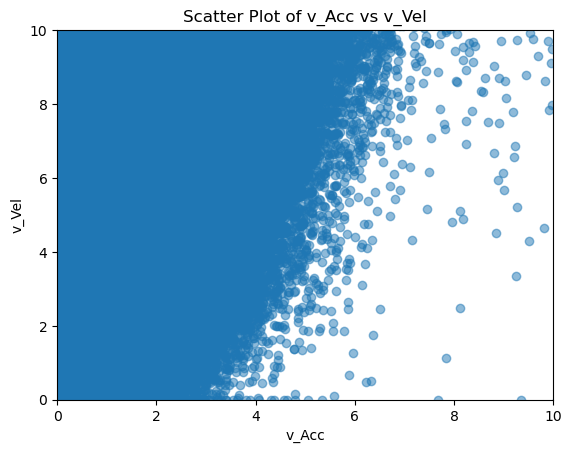

In [14]:
import matplotlib.pyplot as plt

# Set the range for x-axis and y-axis
x_min, x_max = 0, 10  # Specify the desired range for x-axis
y_min, y_max = 0, 10  # Specify the desired range for y-axis

# Create a scatter plot
plt.scatter(df_1['v_Acc'], df_1['v_Vel'], alpha=0.5)

# Set labels and title
plt.xlabel('v_Acc')
plt.ylabel('v_Vel')
plt.title('Scatter Plot of v_Acc vs v_Vel')

# Set the range for x-axis and y-axis
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Display the plot
plt.show()


## BASE - MODEL RANDOM FOREST

In [13]:
from sklearn.ensemble import RandomForestRegressor 
X_train = filtered_df.drop(['v_Acc','Location', 'Period'], axis=1)
y_train = filtered_df['v_Acc']

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145725 entries, 0 to 3145724
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Vehicle_ID     int64  
 1   Frame_ID       int64  
 2   Total_Frames   int64  
 3   Global_Time    int64  
 4   Local_X        float64
 5   Local_Y        float64
 6   Global_X       float64
 7   Global_Y       float64
 8   v_Length       float64
 9   v_Width        float64
 10  v_Class        int64  
 11  v_Vel          float64
 12  v_Acc          float64
 13  Lane_ID        int64  
 14  Preceding      int64  
 15  Following      int64  
 16  Space_Headway  float64
 17  Time_Headway   float64
 18  Location       object 
 19  Period         object 
dtypes: float64(10), int64(8), object(2)
memory usage: 480.0+ MB


In [15]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, oob_score=True)

In [16]:
X_test = filtered_df_us101.drop(['v_Acc' ,'Location' , 'Period'] ,axis = 1)
y_test = filtered_df_us101['v_Acc']

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3139359 entries, 0 to 3145724
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Vehicle_ID     int64  
 1   Frame_ID       int64  
 2   Total_Frames   int64  
 3   Global_Time    int64  
 4   Local_X        float64
 5   Local_Y        float64
 6   Global_X       float64
 7   Global_Y       float64
 8   v_Length       float64
 9   v_Width        float64
 10  v_Class        int64  
 11  v_Vel          float64
 12  Lane_ID        int64  
 13  Preceding      int64  
 14  Following      int64  
 15  Space_Headway  float64
 16  Time_Headway   float64
dtypes: float64(9), int64(8)
memory usage: 431.1 MB


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138632 entries, 0 to 3145724
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Vehicle_ID    int64  
 1   Frame_ID      int64  
 2   Total_Frames  int64  
 3   Global_Time   int64  
 4   Local_X       float64
 5   Local_Y       float64
 6   Global_X      float64
 7   Global_Y      float64
 8   v_Length      float64
 9   v_Width       float64
 10  v_Class       int64  
 11  v_Vel         float64
 12  Lane_ID       int64  
 13  Preceeding    int64  
 14  Following     int64  
 15  Space_Hdwy    float64
 16  Time_Hdwy     float64
dtypes: float64(9), int64(8)
memory usage: 431.0 MB


In [19]:
X_test = X_test.rename(columns = {'Preceeding' : 'Preceding' , 'Space_Hdwy' : 'Space_Headway' , 'Time_Hdwy' : 'Time_Headway'})
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138632 entries, 0 to 3145724
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Vehicle_ID     int64  
 1   Frame_ID       int64  
 2   Total_Frames   int64  
 3   Global_Time    int64  
 4   Local_X        float64
 5   Local_Y        float64
 6   Global_X       float64
 7   Global_Y       float64
 8   v_Length       float64
 9   v_Width        float64
 10  v_Class        int64  
 11  v_Vel          float64
 12  Lane_ID        int64  
 13  Preceding      int64  
 14  Following      int64  
 15  Space_Headway  float64
 16  Time_Headway   float64
dtypes: float64(9), int64(8)
memory usage: 431.0 MB


In [20]:
rf.score(X_test,y_test)

-2.5929659030043877

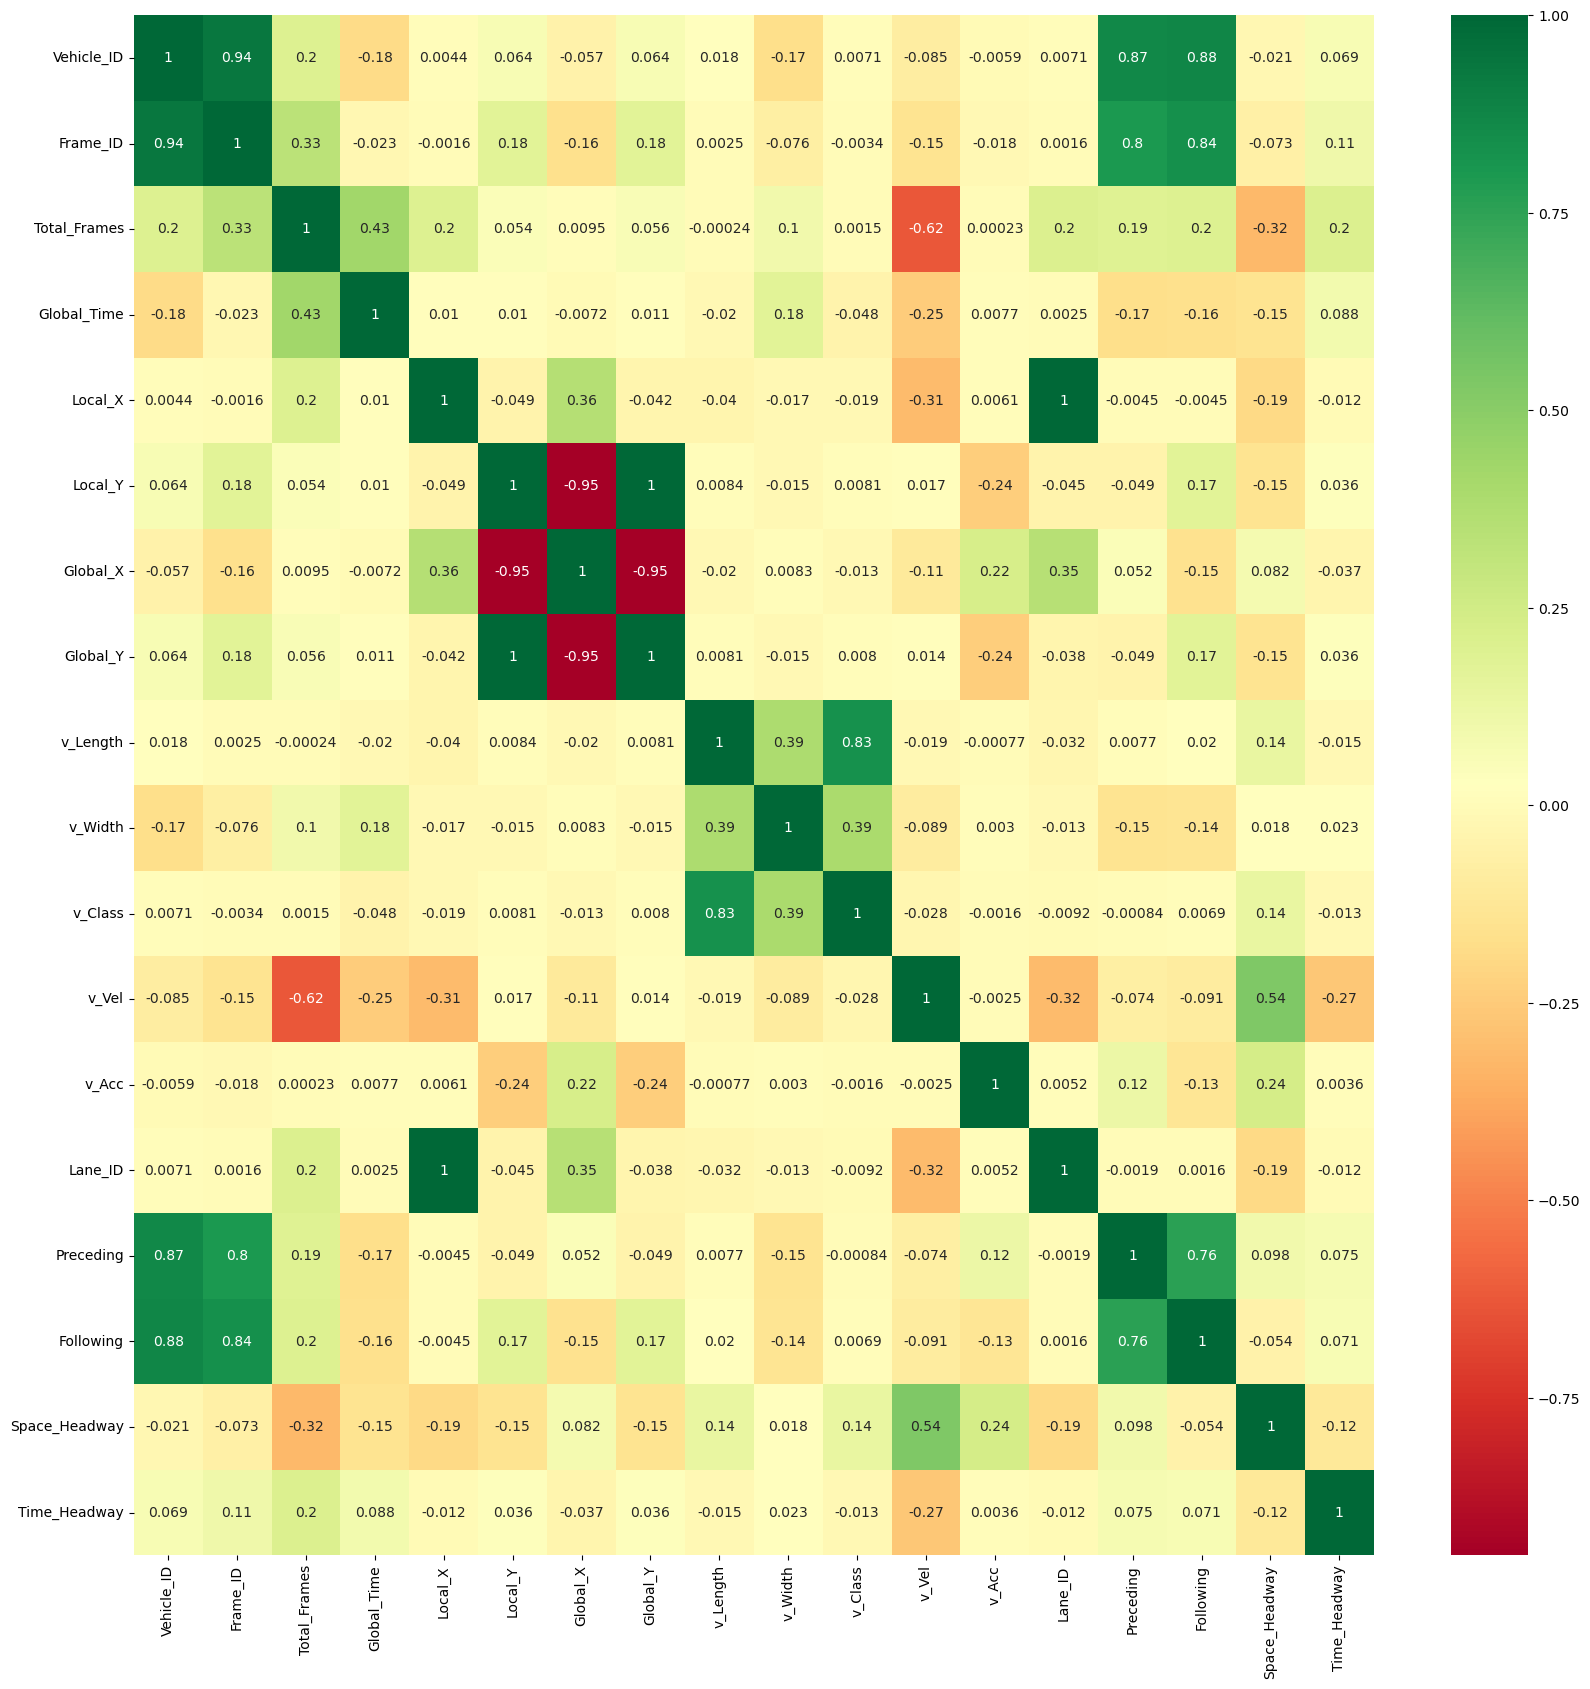

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 
corr_df =filtered_df.corr()
top_corr_feature = corr_df.index

plt.figure(figsize = (20,20))

plot = sns.heatmap(filtered_df[top_corr_feature].corr() , annot = True ,  cmap = "RdYlGn" )



In [15]:
filtered_df = filtered_df.drop(['Vehicle_ID' , 'Frame_ID' , 'Local_X','Local_Y' , 'Global_X' , 'Global_Y'] , axis = 1)


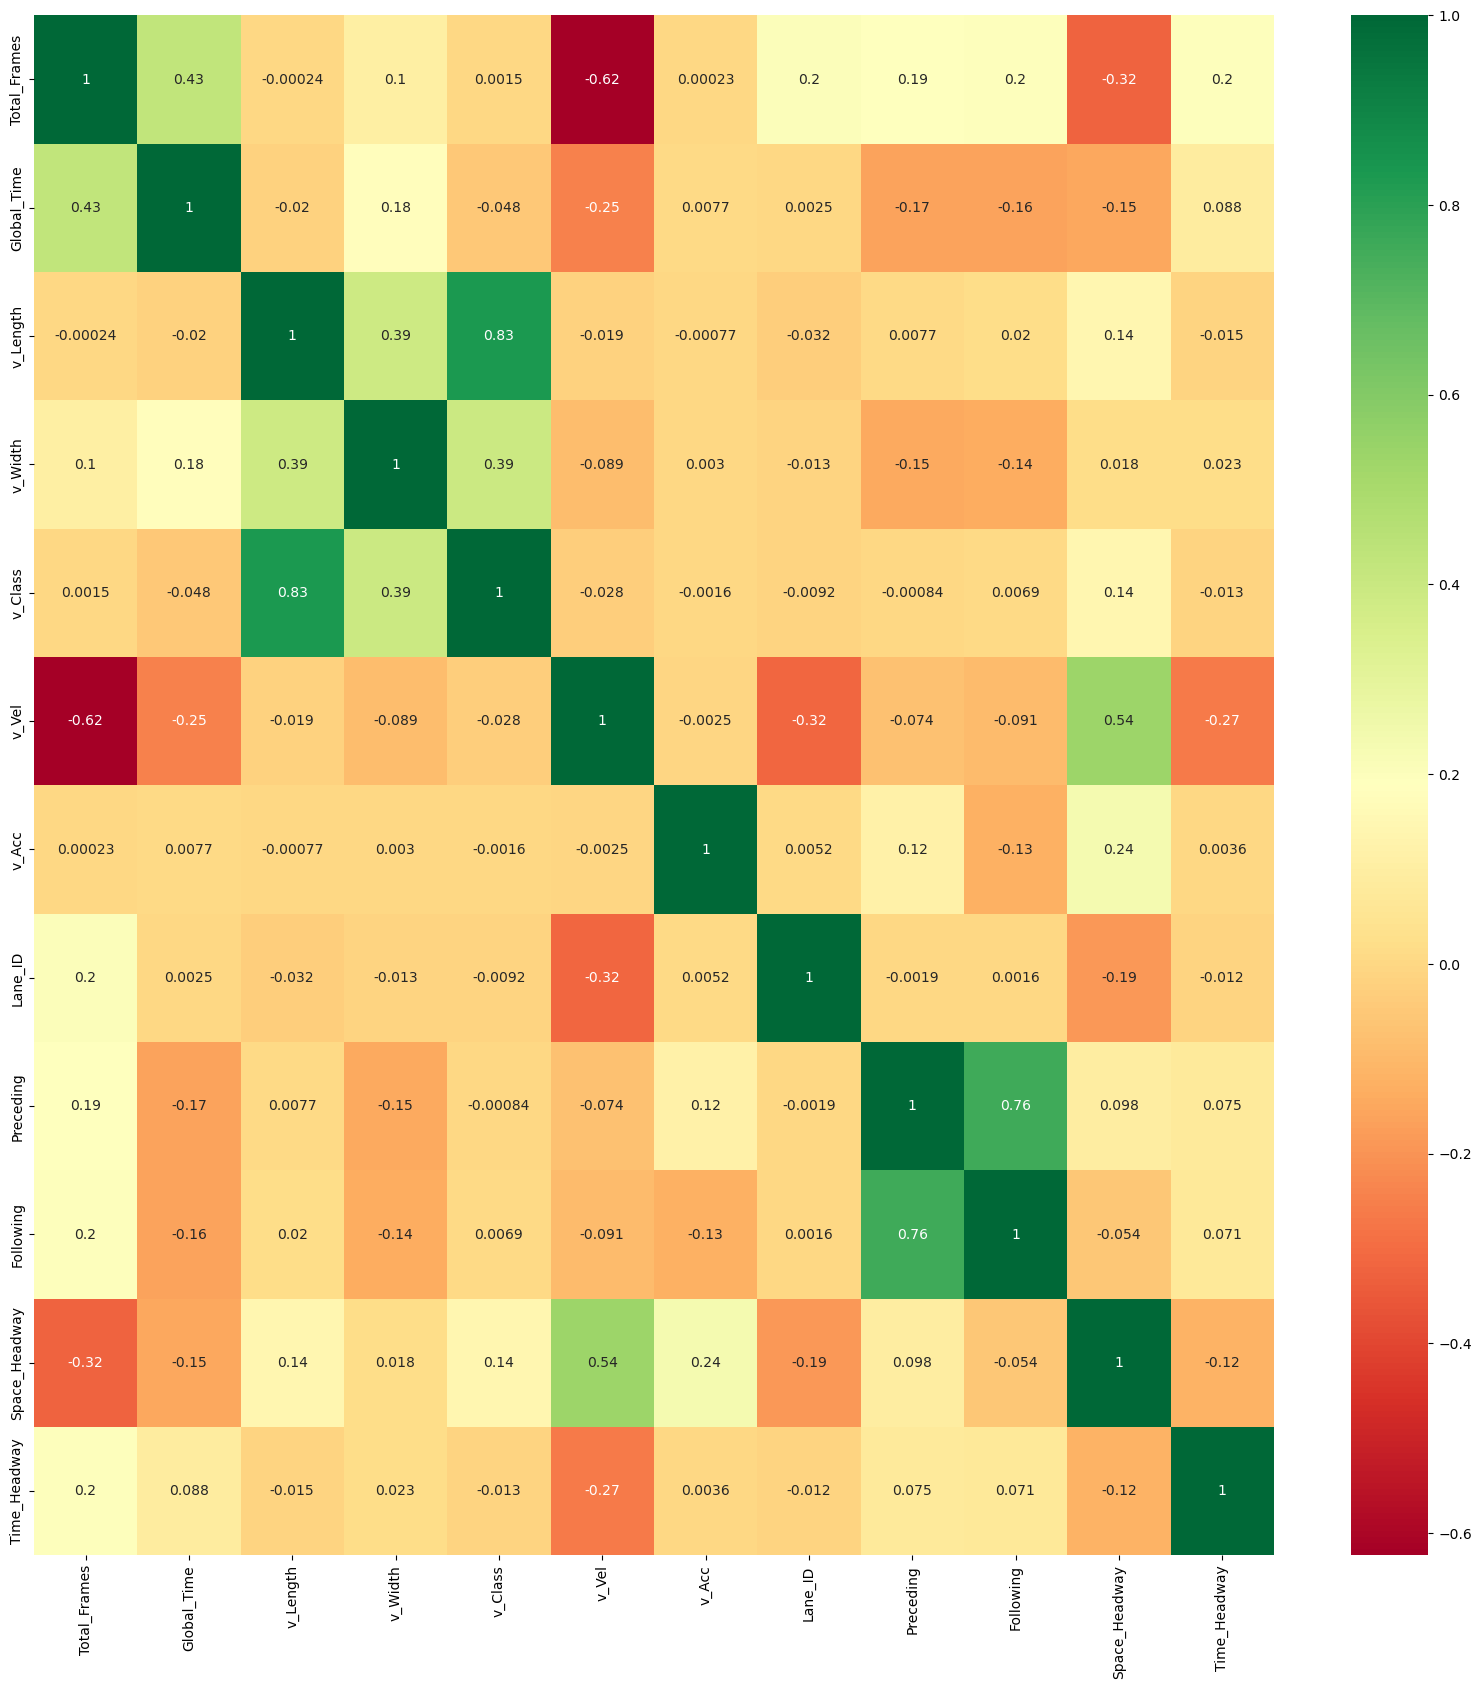

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 
corr_df =filtered_df.corr()
top_corr_feature = corr_df.index

plt.figure(figsize = (20,20))

plot = sns.heatmap(filtered_df[top_corr_feature].corr() , annot = True ,  cmap = "RdYlGn" )



In [17]:
filtered_df_us101 = filtered_df_us101.drop(['Local_Y' , 'Global_X' , 'Global_Y' , 'Vehicle_ID' , 'Frame_ID' , 'Local_X'] , axis = 1)

In [18]:
from sklearn.ensemble import RandomForestRegressor 
X_train = filtered_df.drop(['v_Acc','Location', 'Period'], axis=1)
y_train = filtered_df['v_Acc']

In [19]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, oob_score=True)

In [20]:
X_test = filtered_df_us101.drop(['v_Acc' ,'Location' , 'Period'] ,axis = 1)
y_test = filtered_df_us101['v_Acc']

In [22]:
X_test = X_test.rename(columns = {'Preceeding' : 'Preceding' , 'Space_Hdwy' : 'Space_Headway' , 'Time_Hdwy' : 'Time_Headway'})
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138632 entries, 0 to 3145724
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Total_Frames   int64  
 1   Global_Time    int64  
 2   v_Length       float64
 3   v_Width        float64
 4   v_Class        int64  
 5   v_Vel          float64
 6   Lane_ID        int64  
 7   Preceding      int64  
 8   Following      int64  
 9   Space_Headway  float64
 10  Time_Headway   float64
dtypes: float64(5), int64(6)
memory usage: 287.4 MB


In [23]:
rf.score(X_test,y_test)

0.1289963097953778